In [1]:
# Importing the libraries1
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Problem Statement

Given is the dataset of various loan application counts spread over different
parts of the country. In order to accurately scale their services this company wants to
predict the upcoming count of the number of applications over the next 3 months.
The given dataset is a daily level record of application counts. The train data has data
until 2019 April, candidates should predict for the next 3 months which is for ~90 days.

In [4]:
X=pd.read_excel("Train-test.xlsx", sheet_name='Train')
y=pd.read_excel("Train-test.xlsx", sheet_name='Test')

In [5]:
X

,APPLIED_DATE,GROUP,BRANCH_ID,STATE,ZONE,APPLICATION_COUNT
0,2017-04-01,1,0,WEST BENGAL,EAST,55
1,2017-04-03,1,0,WEST BENGAL,EAST,10
2,2017-04-04,1,0,WEST BENGAL,EAST,13
3,2017-04-05,1,0,WEST BENGAL,EAST,125
4,2017-04-07,1,0,WEST BENGAL,EAST,83
5,2017-04-12,1,0,WEST BENGAL,EAST,137
6,2017-04-13,1,0,WEST BENGAL,EAST,87
7,2017-04-14,1,0,WEST BENGAL,EAST,132
8,2017-04-15,1,0,WEST BENGAL,EAST,142
9,2017-04-16,1,0,WEST BENGAL,EAST,46


In [6]:
X.dtypes

APPLIED_DATE         datetime64[ns]
GROUP                         int64
BRANCH_ID                     int64
STATE                        object
ZONE                         object
APPLICATION_COUNT             int64
dtype: object

# Modeling and prediction of missing value of Zone of Train data

In [7]:
X_train1=X[X['GROUP']==1]
X_train5=X[X['GROUP']==1] #dublicate

In [8]:
X_test1=X[X['GROUP']==2] # value to be predited

## Analysis

In [9]:
X_train1['STATE'].value_counts()

MAHARASHTRA       9620
WEST BENGAL       5920
GUJARAT           5920
TAMIL NADU        5180
UTTAR PRADESH     5180
ANDHRA PRADESH    4440
PUNJAB            3700
HARYANA           2960
ASSAM             2960
BIHAR             2220
ORISSA            2220
KARNATAKA         2220
TELANGANA         1480
JHARKHAND         1480
UTTARAKHAND       1480
TRIPURA           1480
CHHATTISGARH       740
KERALA             740
DELHI              740
MADHYA PRADESH     740
Name: STATE, dtype: int64

In [10]:
X_test1['STATE'].value_counts()

JHARKHAND         760
PUNJAB            760
HARYANA           760
CHHATTISGARH      760
ORISSA            760
TAMIL NADU        760
UTTAR PRADESH     760
KARNATAKA         760
TRIPURA           760
BIHAR             760
GUJARAT           760
ASSAM             760
KERALA            760
MAHARASHTRA       760
WEST BENGAL       760
MADHYA PRADESH    760
Name: STATE, dtype: int64

In [11]:
#ANDHRA PRADESH TELANGANA  UTTARAKHAND    DELHI      
c1=['ANDHRA PRADESH', 'TELANGANA',  'UTTARAKHAND',  'DELHI']      
X_train1.drop(X_train1[X_train1['STATE'].isin(c1)].index,inplace=True)


C:\Users\Lenovo\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

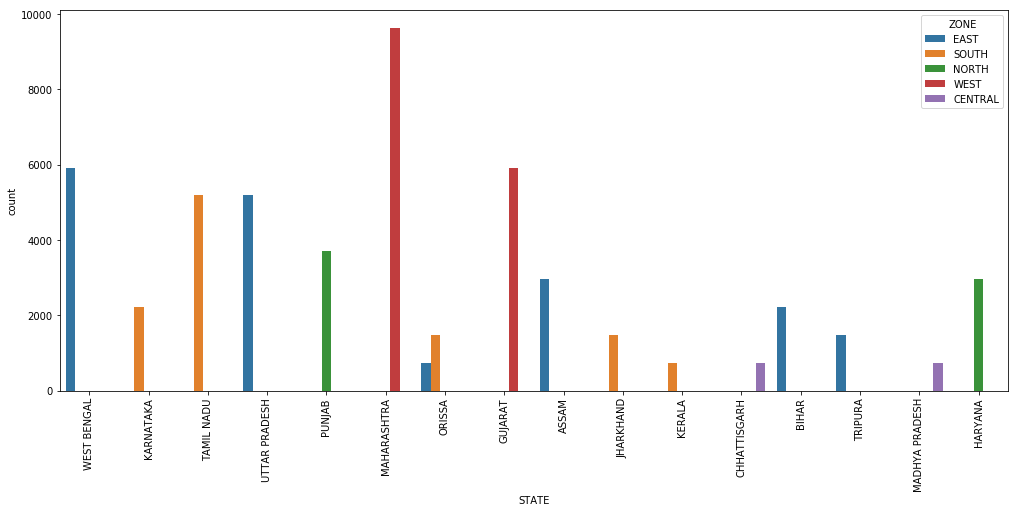

In [12]:
plt.figure(figsize=(17,7))
sns.countplot(X_train1['STATE'],hue=X_train1['ZONE'])
plt.xticks(rotation=90) #as they have variation we can use it

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71]), <a list of 72 Text xticklabel objects>)

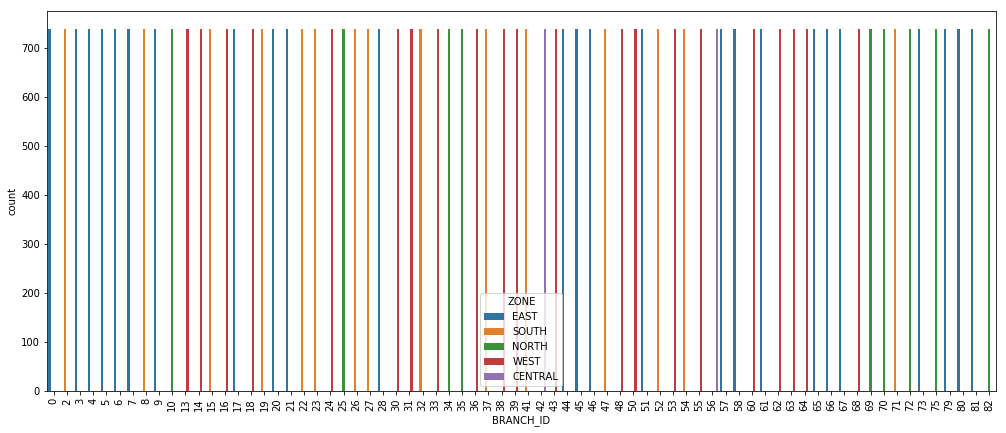

In [13]:
plt.figure(figsize=(17,7))
sns.countplot(X_train1['BRANCH_ID'],hue=X_train1['ZONE'])
plt.xticks(rotation=90) #as they dont't have variation we cannot use it

# Feature Engineering

In [14]:
X_train2=X_train1.iloc[:,3:4].values
X_test2=X_train1.iloc[:,4].values

In [15]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X_train2[:,0] = labelencoder.fit_transform(X_train2[:, 0])

In [16]:
X_train3=X_test1.iloc[:,3:4].values

In [17]:
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X_train3[:,0] = labelencoder.fit_transform(X_train3[:, 0])

In [18]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X_test2 = labelencoder.fit_transform(X_test2)

In [19]:
import sklearn.preprocessing
a = X_train2[:,0].astype(int)
label_binarizer = sklearn.preprocessing.LabelBinarizer()
label_binarizer.fit(range(max(a)+1))
b = label_binarizer.transform(a)
X_train2=np.concatenate((b,X_train2),axis=1)
X_train2 = X_train2[:, 1:]

In [20]:
#import sklearn.preprocessing
a = X_train3[:,0].astype(int)
label_binarizer = sklearn.preprocessing.LabelBinarizer()
label_binarizer.fit(range(max(a)+1))
b = label_binarizer.transform(a)
X_train3=np.concatenate((b,X_train3),axis=1)
X_train3 = X_train3[:, 1:]

In [21]:
w=pd.DataFrame(X_train2)
w.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,15
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,15
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,15
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,15
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,15


In [22]:
X_train2=X_train2[:,0:15]

X_train3=X_train3[:,0:15]

In [23]:
X_train1['ZONE'].value_counts()

EAST       18500
WEST       15540
SOUTH      11100
NORTH       6660
CENTRAL     1480
Name: ZONE, dtype: int64

## Modeling

In [24]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, random_state = 0)
classifier.fit(X_train2,X_test2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [25]:
y_pred1= classifier.predict(X_train2)

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(X_test2, y_pred1)

In [27]:
from sklearn.metrics import f1_score
f1_score(X_test2, y_pred1, average='weighted')

0.9861934020920196

## Adding the predicted value

In [28]:
X_test3 = classifier.predict(X_train3)
w=pd.DataFrame(X_test3)

In [29]:
#X_test1.drop(axis=1,columns='ZONE',inplace=True)
#X_test1.drop(axis=1,columns='ZON',inplace=True)

In [30]:
def install(x):
    if x==1:
        return "EAST"
    if x==4:
        return 'WEST'
    if x==3:
        return 'SOUTH'
    if x==2:
        return 'NORTH'
    if x==0:
        return 'CENTRAL'

w[0]=w[0].apply(lambda x: install(x))

In [31]:
x=w.values
x

array([['EAST'],
       ['EAST'],
       ['EAST'],
       ...,
       ['EAST'],
       ['EAST'],
       ['EAST']], dtype=object)

In [32]:
X_test1['ZONE']=x

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [33]:
X_test1.columns

Index(['APPLIED_DATE', 'GROUP', 'BRANCH_ID', 'STATE', 'ZONE',
       'APPLICATION_COUNT'],
      dtype='object')

In [34]:
X_test1['ZONE'].value_counts()

SOUTH      3800
EAST       3800
WEST       1520
NORTH      1520
CENTRAL    1520
Name: ZONE, dtype: int64

In [35]:
X_test1=X_test1[['APPLIED_DATE', 'GROUP', 'BRANCH_ID', 'STATE','ZONE', 'APPLICATION_COUNT']]

In [36]:
X=pd.concat([X_train5,X_test1], ignore_index=True)

In [37]:
X[X['STATE'].isnull()]

,APPLIED_DATE,GROUP,BRANCH_ID,STATE,ZONE,APPLICATION_COUNT


# Modeling and predicting missing value of Zone of Test data

In [38]:
X_train1=y[y['GROUP']==1]
X_train5=y[y['GROUP']==1] #dublicate
X_test1=y[y['GROUP']==2] # value to be predited

In [39]:
#X_train1['STATE'].value_counts()

In [40]:
#X_test1['STATE'].value_counts()

In [41]:
#ANDHRA PRADESH TELANGANA  UTTARAKHAND    DELHI      
c1=['ANDHRA PRADESH', 'TELANGANA',  'UTTARAKHAND',  'DELHI']      
X_train1.drop(X_train1[X_train1['STATE'].isin(c1)].index,inplace=True)


C:\Users\Lenovo\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [42]:
X_train2=X_train1.iloc[:,3:4].values
X_test2=X_train1.iloc[:,4].values
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X_train2[:,0] = labelencoder.fit_transform(X_train2[:, 0])
X_train3=X_test1.iloc[:,3:4].values
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X_train3[:,0] = labelencoder.fit_transform(X_train3[:, 0])
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X_test2 = labelencoder.fit_transform(X_test2)
#import sklearn.preprocessing
a = X_train2[:,0].astype(int)
label_binarizer = sklearn.preprocessing.LabelBinarizer()
label_binarizer.fit(range(max(a)+1))
b = label_binarizer.transform(a)
X_train2=np.concatenate((b,X_train2),axis=1)
X_train2 = X_train2[:, 1:]
#import sklearn.preprocessing
a = X_train3[:,0].astype(int)
label_binarizer = sklearn.preprocessing.LabelBinarizer()
label_binarizer.fit(range(max(a)+1))
b = label_binarizer.transform(a)
X_train3=np.concatenate((b,X_train3),axis=1)
X_train3 = X_train3[:, 1:]
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, random_state = 0)
classifier.fit(X_train2,X_test2)
y_pred1= classifier.predict(X_train2)
X_test3 = classifier.predict(X_train3)
w=pd.DataFrame(X_test3)
def install(x):
    if x==1:
        return "EAST"
    if x==4:
        return 'WEST'
    if x==3:
        return 'SOUTH'
    if x==2:
        return 'NORTH'
    if x==0:
        return 'CENTRAL'

w[0]=w[0].apply(lambda x: install(x))
x=w.values
X_test1['ZONE']=x
X_test1['ZONE'].value_counts()
X_test1=X_test1[['APPLIED_DATE', 'GROUP', 'BRANCH_ID', 'STATE','ZONE']]
y=pd.concat([X_train5,X_test1], ignore_index=True)

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


# Clustering of Train and Test data Starts from here

## Feature Engineering

In [43]:
#X['STATE'].value_counts()

In [44]:
#y['STATE'].value_counts()

In [45]:
X.tail()

,APPLIED_DATE,GROUP,BRANCH_ID,STATE,ZONE,APPLICATION_COUNT
73575,2019-04-26,2,83,WEST BENGAL,EAST,2137
73576,2019-04-27,2,83,WEST BENGAL,EAST,1468
73577,2019-04-28,2,83,WEST BENGAL,EAST,851
73578,2019-04-29,2,83,WEST BENGAL,EAST,346
73579,2019-04-30,2,83,WEST BENGAL,EAST,83


In [46]:
#y[y['ZONE'].isnull()]

In [47]:
X_train=X.iloc[:,[1,2,3,4]].values

In [48]:
y_train=y.iloc[:,[1,2,3,4]].values

In [49]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X_train[:,-2] = labelencoder.fit_transform(X_train[:, -2])

In [50]:
X_train[:,-1] = labelencoder.fit_transform(X_train[:, -1])

In [51]:
y_train[:,-2] = labelencoder.fit_transform(y_train[:, -2])
y_train[:,-1] = labelencoder.fit_transform(y_train[:, -1])

In [52]:
a = X_train[:,-2].astype(int)
label_binarizer = sklearn.preprocessing.LabelBinarizer()
label_binarizer.fit(range(max(a)+1))
b = label_binarizer.transform(a)
X_train=np.concatenate((b,X_train),axis=1)
X_train = X_train[:, 1:]


In [53]:
a = X_train[:,-1].astype(int)
label_binarizer = sklearn.preprocessing.LabelBinarizer()
label_binarizer.fit(range(max(a)+1))
b = label_binarizer.transform(a)
X_train=np.concatenate((b,X_train),axis=1)
X_train = X_train[:, 1:]

In [54]:
a = y_train[:,-2].astype(int)
label_binarizer = sklearn.preprocessing.LabelBinarizer()
label_binarizer.fit(range(max(a)+1))
b = label_binarizer.transform(a)
y_train=np.concatenate((b,y_train),axis=1)
y_train = y_train[:, 1:]

a = y_train[:,-1].astype(int)
label_binarizer = sklearn.preprocessing.LabelBinarizer()
label_binarizer.fit(range(max(a)+1))
b = label_binarizer.transform(a)
y_train=np.concatenate((b,y_train),axis=1)
y_train = y_train[:, 1:]

In [55]:
w=pd.DataFrame(X_train)
w.tail()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
73575,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,2,83,19,1
73576,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,2,83,19,1
73577,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,2,83,19,1
73578,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,2,83,19,1
73579,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,2,83,19,1


In [56]:
X_train=X_train[:,0:25]

In [57]:
y_train=y_train[:,0:25]

## Modeling

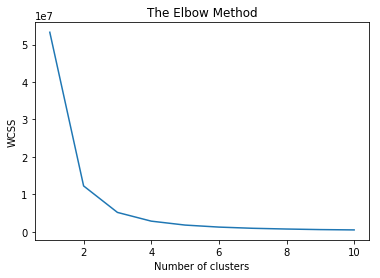

In [58]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [59]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42) #as wcss is very less in cluster 3 and is constant
y_kmeans = kmeans.fit_predict(X_train)

In [60]:
a=pd.DataFrame(y_kmeans)
a[0].value_counts()

0    27700
2    22940
1    22940
Name: 0, dtype: int64

In [61]:
X['Clusters']=y_kmeans

In [62]:
X.head()

,APPLIED_DATE,GROUP,BRANCH_ID,STATE,ZONE,APPLICATION_COUNT,Clusters
0,2017-04-01,1,0,WEST BENGAL,EAST,55,1
1,2017-04-03,1,0,WEST BENGAL,EAST,10,1
2,2017-04-04,1,0,WEST BENGAL,EAST,13,1
3,2017-04-05,1,0,WEST BENGAL,EAST,125,1
4,2017-04-07,1,0,WEST BENGAL,EAST,83,1


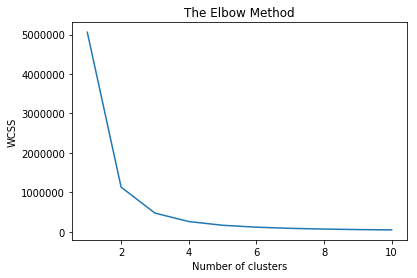

In [63]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(y_train)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [64]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42) #as wcss is very less in cluster 3 and is constant
y_kmeans = kmeans.fit_predict(y_train)

In [65]:
y['Clusters']=y_kmeans

In [66]:
y.tail()

,APPLIED_DATE,GROUP,BRANCH_ID,STATE,ZONE,Clusters
6817,2019-07-19,2,83,WEST BENGAL,EAST,2
6818,2019-07-20,2,83,WEST BENGAL,EAST,2
6819,2019-07-21,2,83,WEST BENGAL,EAST,2
6820,2019-07-22,2,83,WEST BENGAL,EAST,2
6821,2019-07-23,2,83,WEST BENGAL,EAST,2


# Modeling and Prediction of Application count starts from here

In [67]:
X.columns

Index(['APPLIED_DATE', 'GROUP', 'BRANCH_ID', 'STATE', 'ZONE',
       'APPLICATION_COUNT', 'Clusters'],
      dtype='object')

## Analysis

In [68]:
X=X[['APPLIED_DATE', 'GROUP', 'BRANCH_ID', 'STATE', 'ZONE','Clusters','APPLICATION_COUNT']]

In [69]:
X.head()

,APPLIED_DATE,GROUP,BRANCH_ID,STATE,ZONE,Clusters,APPLICATION_COUNT
0,2017-04-01,1,0,WEST BENGAL,EAST,1,55
1,2017-04-03,1,0,WEST BENGAL,EAST,1,10
2,2017-04-04,1,0,WEST BENGAL,EAST,1,13
3,2017-04-05,1,0,WEST BENGAL,EAST,1,125
4,2017-04-07,1,0,WEST BENGAL,EAST,1,83


In [70]:
y.head()

,APPLIED_DATE,GROUP,BRANCH_ID,STATE,ZONE,Clusters
0,2019-05-01,1,0,WEST BENGAL,EAST,1
1,2019-05-02,1,0,WEST BENGAL,EAST,1
2,2019-05-03,1,0,WEST BENGAL,EAST,1
3,2019-05-04,1,0,WEST BENGAL,EAST,1
4,2019-05-05,1,0,WEST BENGAL,EAST,1


In [71]:
X.corr()

,GROUP,BRANCH_ID,Clusters,APPLICATION_COUNT
GROUP,1.000000,0.580359,-0.503181,0.455379
BRANCH_ID,0.580359,1.000000,-0.516412,0.242747
Clusters,-0.503181,-0.516412,1.000000,-0.223399
APPLICATION_COUNT,0.455379,0.242747,-0.223399,1.000000


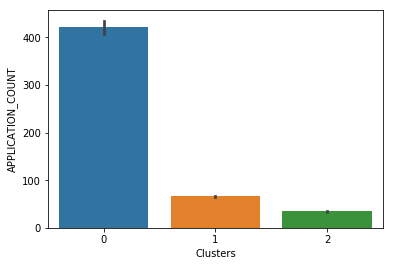

In [72]:
sns.barplot(x='Clusters',y='APPLICATION_COUNT',data=X) #it has good vairability

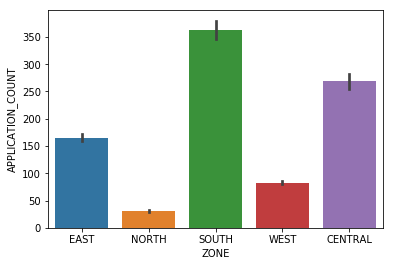

In [73]:
sns.barplot(x='ZONE',y='APPLICATION_COUNT',data=X) #they have a high variability

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

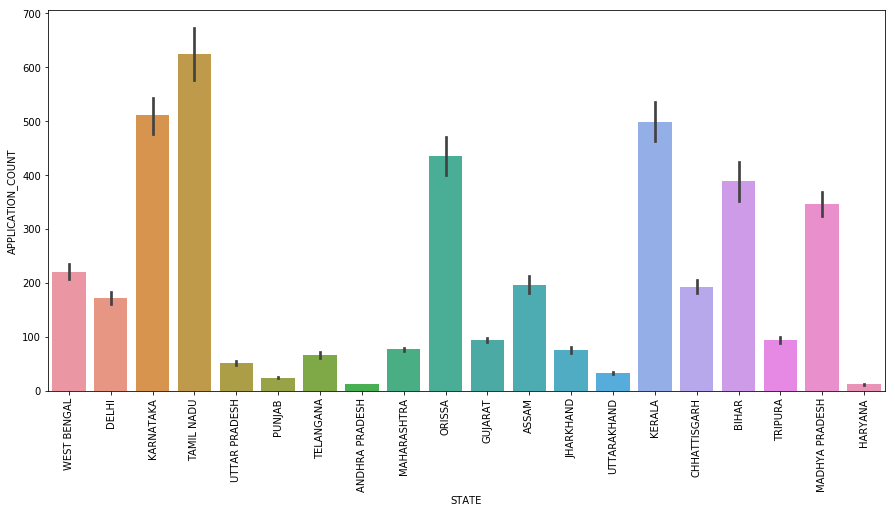

In [74]:
plt.figure(figsize=(15,7))
sns.barplot(x='STATE',y='APPLICATION_COUNT',data=X)
plt.xticks(rotation=90) #they have a good variability

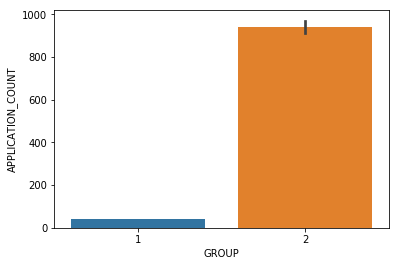

In [75]:
sns.barplot(x='GROUP',y='APPLICATION_COUNT',data=X) #we can use this too

In [76]:
X.columns

Index(['APPLIED_DATE', 'GROUP', 'BRANCH_ID', 'STATE', 'ZONE', 'Clusters',
       'APPLICATION_COUNT'],
      dtype='object')

## Feature Engineering

In [77]:
X_train=X.iloc[:,[1,2,3,4,5]].values 

In [78]:
X_test=X.iloc[:,6].values

In [79]:
y_train=y.iloc[:,[1,2,3,4,5]].values

In [80]:
labelencoder = LabelEncoder()
X_train[:,-2] = labelencoder.fit_transform(X_train[:, -2])
X_train[:,-3] = labelencoder.fit_transform(X_train[:, -3])
#X_train[:,-1] = labelencoder.fit_transform(X_train[:, -1])

In [81]:
labelencoder = LabelEncoder()
y_train[:,-3] = labelencoder.fit_transform(y_train[:, -3])
y_train[:,-2] = labelencoder.fit_transform(y_train[:, -2])
#y_train[:,-1] = labelencoder.fit_transform(y_train[:, -1])

In [82]:
a = X_train[:,-1].astype(int)
label_binarizer = sklearn.preprocessing.LabelBinarizer()
label_binarizer.fit(range(max(a)+1))
b = label_binarizer.transform(a)
X_train=np.concatenate((b,X_train),axis=1)
X_train = X_train[:, 1:]

In [83]:
a = X_train[:,-2].astype(int)
label_binarizer = sklearn.preprocessing.LabelBinarizer()
label_binarizer.fit(range(max(a)+1))
b = label_binarizer.transform(a)
X_train=np.concatenate((b,X_train),axis=1)
X_train = X_train[:, 1:]


In [84]:
a = X_train[:,-3].astype(int)
label_binarizer = sklearn.preprocessing.LabelBinarizer()
label_binarizer.fit(range(max(a)+1))
b = label_binarizer.transform(a)
X_train=np.concatenate((b,X_train),axis=1)
X_train = X_train[:, 1:]



In [85]:
a = y_train[:,-1].astype(int)
label_binarizer = sklearn.preprocessing.LabelBinarizer()
label_binarizer.fit(range(max(a)+1))
b = label_binarizer.transform(a)
y_train=np.concatenate((b,y_train),axis=1)
y_train = y_train[:, 1:]


In [86]:
a = y_train[:,-2].astype(int)
label_binarizer = sklearn.preprocessing.LabelBinarizer()
label_binarizer.fit(range(max(a)+1))
b = label_binarizer.transform(a)
y_train=np.concatenate((b,y_train),axis=1)
y_train = y_train[:, 1:]



In [87]:
a = y_train[:,-3].astype(int)
label_binarizer = sklearn.preprocessing.LabelBinarizer()
label_binarizer.fit(range(max(a)+1))
b = label_binarizer.transform(a)
y_train=np.concatenate((b,y_train),axis=1)
y_train = y_train[:, 1:]

In [88]:
w=pd.DataFrame(y_train)
w.tail()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
6817,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,2,83,19,1,2
6818,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,2,83,19,1,2
6819,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,2,83,19,1,2
6820,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,2,83,19,1,2
6821,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,2,83,19,1,2


In [89]:
X_train=X_train[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]]

In [90]:
y_train=y_train[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]]

## Linear Regression

In [91]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,X_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [92]:
y_pred=regressor.predict(X_train)

In [93]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = X_train, y = X_test, cv = 10,scoring='r2')
print(accuracies.mean())
print(accuracies.std())

-9.450633462788713e+20
2.831654231963112e+21


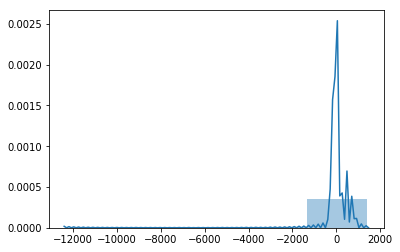

In [94]:
sns.distplot((y_pred-X_test),bins=5)

In [95]:
from sklearn.metrics import r2_score
r2=r2_score(X_test, y_pred)
r2 #r square

0.2749828563050378

In [96]:
(1-((1-r2)*((73580-1)/(73580-4-1))))  #adjusted r-square

0.2749434398106473

In [97]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(X_test, y_pred))
rms #root mean square error

625.6778516127088

In [98]:
np.mean(np.abs((X_test - y_pred) / X_test)) * 100 #mape

1177.884538536522

### Insight

1.As from the graph it is clearly seen that there is not so high distribution around 0 as error are more
2.As the R-square and adjusted R-square is very less the model has a very poor performance

## Decision Tree

In [99]:
from sklearn.tree import DecisionTreeRegressor
regressor1 = DecisionTreeRegressor(random_state = 0)
regressor1.fit(X_train, X_test)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [100]:
y_pred = regressor1.predict(X_train)

In [101]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
accuracies = cross_val_score(estimator = regressor1, X = X_train, y = X_test, cv = 10,scoring='r2')
print(accuracies.mean())
print(accuracies.std())

-0.26591155320682447
0.3538446829809347


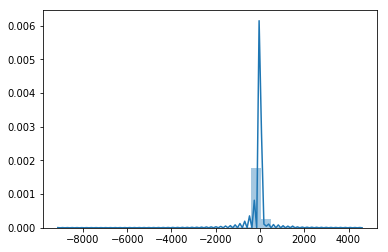

In [102]:
sns.distplot((y_pred-X_test),bins=30)

In [103]:
from sklearn.metrics import r2_score
r2=r2_score(X_test, y_pred)
r2 #r square

0.5920424729606231

In [104]:
(1-((1-r2)*((73580-1)/(73580-4-1))))  #adjusted r-square

0.5920202938222179

In [105]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mean_absolute_percentage_error(X_test,y_pred) #mape

190.37371154170486

In [106]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(X_test, y_pred))
rms #root mean square error

469.3362715213254

### Insight

1. Here we can see that the accuracy of the model is more as r-square and adjusted r-square is higher than 50% which can be acceptable value

## Comparison

1. We can see that Decision tree has high R-square and adjusted r-square than linear regression
2. It has low root mean square error than linear regression
3. After cross validation the accuracy of it is high
4. We will go for Decision tree for predictions

## Prediction with Decision tree

In [107]:
y_pred = regressor1.predict(y_train)
df=pd.DataFrame(y_pred)
df.rename(columns={0:"APPLICATION_COUNT"},inplace=True)

In [108]:
#df

In [109]:
df.to_csv('usama.csv',index=False)

# Forecasting Using exponential smoothing

In [110]:
df=X[['APPLIED_DATE','APPLICATION_COUNT']]

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2 
import seaborn as sns
sns.set()

In [112]:
df.set_index('APPLIED_DATE',inplace=True)
df.index=pd.DatetimeIndex(df.index)

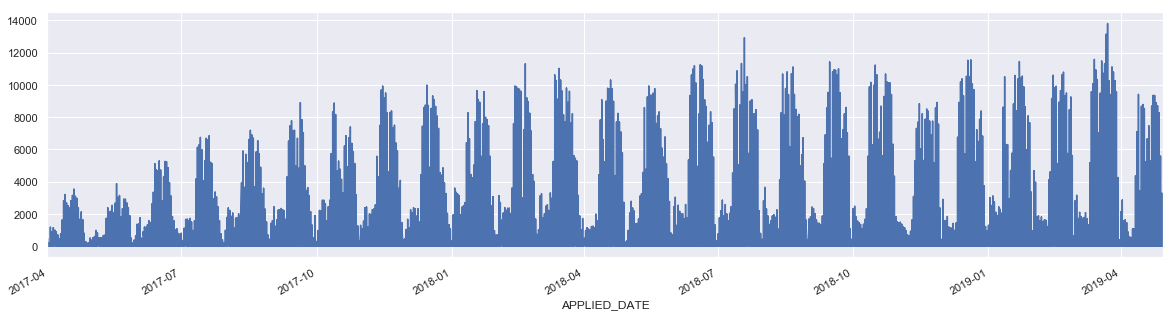

In [113]:
df.APPLICATION_COUNT.plot(figsize=(20,5))

In [114]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
#model_1 = ARMA(df.APPLICATION_COUNT, order=(3,1,2))
expsmodel = ExponentialSmoothing(df.APPLICATION_COUNT, seasonal = "additive",
                                 seasonal_periods = 12)

C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)


In [115]:
expsmodelfit = expsmodel.fit()

C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [116]:
expsmodelfit.params['smoothing_level']

0.9473684182142456

In [117]:
expsfcast = expsmodelfit.fittedvalues

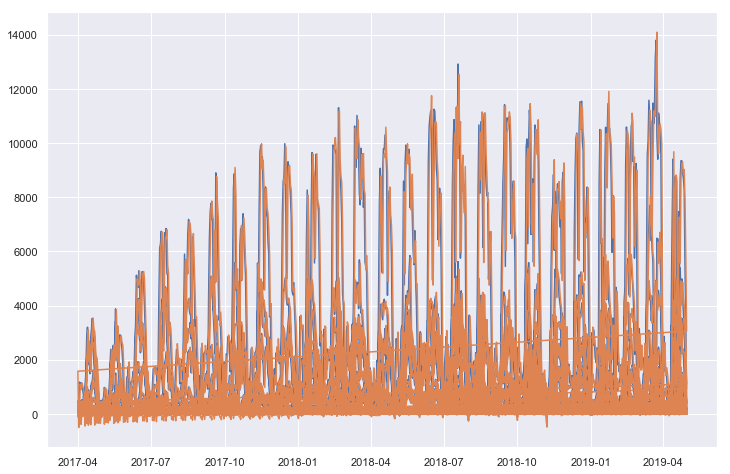

In [118]:
plt.figure(figsize=(12,8))
plt.plot(df, label='data')
plt.plot(expsfcast, label='HW forecast')

In [119]:
r2=r2_score(df, expsfcast)
r2 #r square

0.8853536591168786

In [120]:
rms = sqrt(mean_squared_error(df, expsfcast))
rms #root mean square error

248.80364739480638